In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import plotly.plotly as py
%matplotlib inline

In [159]:
disney = pd.read_csv('Stocks/DIS.csv')
def date(x):
    return datetime.strptime(x, '%Y-%m-%d')
disney.index = map(date,disney.Date)
del disney['Date']
disney = disney.head(2000)
disney

,Open,High,Low,Close,Volume,Adj Close
2015-10-22,110.669998,113.349998,110.389999,113.250000,9844700,113.250000
2015-10-21,110.669998,111.559998,110.010002,110.089996,8769800,110.089996
2015-10-20,109.550003,110.529999,109.410004,109.839996,9542400,109.839996
2015-10-19,108.250000,109.970001,107.940002,109.470001,7974900,109.470001
2015-10-16,108.269997,108.500000,107.459999,108.239998,5739600,108.239998
2015-10-15,106.500000,108.000000,106.260002,107.889999,6698100,107.889999
2015-10-14,106.500000,106.849998,105.230003,105.730003,5464700,105.730003
2015-10-13,105.739998,107.389999,105.309998,106.589996,8295000,106.589996
2015-10-12,105.910004,106.699997,105.620003,106.349998,5133600,106.349998
2015-10-09,105.089996,106.050003,104.669998,105.559998,7312400,105.559998


In [153]:
fig, ax = plt.subplots()
sc = ax.plot(disney.index,
            disney.Close)
ax.grid()

py.iplot_mpl(fig)

In [155]:
print np.fft.fft(disney.Close)


sc = ax.plot(np.fft.fft(disney.Close))
ax.grid()

py.iplot_mpl(fig)

[ 103422.07011500    +0.j           13672.26163889-26044.55540353j
    3389.34667450-16335.5077328j  ...,    3548.81182814 +8119.41958146j
    3389.34667450+16335.5077328j    13672.26163889+26044.55540353j]


ValueError: ordinal must be >= 1

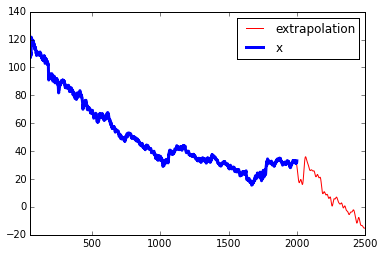

In [158]:
import numpy as np
import pylab as pl
from matplotlib import dates
from numpy import fft
import plotly.plotly as py
from plotly.graph_objs import *


def fourierExtrapolation(x, n_predict,n_harm=100):
    n = x.size
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = range(n)
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t
    
def main():
    #x = disney.index
    def turn_time(x):return x.value
    #x = map(turn_time,x)
    y = disney['Close']

    n_predict = 500
    n_harm=100
    #extrapolationX = fourierExtrapolation(x, n_predict,n_harm)
    extrapolationY = fourierExtrapolation(y, n_predict,n_harm)
    
     
    
    fig, ax = plt.subplots()
    ax.plot(np.arange(0, extrapolationY.size), extrapolationY, 'r', label = 'extrapolation')
    ax.plot(np.arange(0, y.size), y, 'b', label = 'x', linewidth = 3)
    ax.legend()
    ax.set_xlim(left=50)
    pl.show()
    
    '''
    trace1 = go.Scatter(
        x=disney.index,
        y=disney.Close,
        mode='lines+markers',
        name='past'
    )
    trace2 = go.Scatter(
        x=extrapolationX,
        y=extrapolationY,
        mode='lines+markers',
        mame='extrapolation'
    )
    data=[trace1,trace2]
    plot_url = py.plot(data)


    '''

    
if __name__ == "__main__":
    main()


In [135]:
x =disney.index[2]

In [137]:
x.value
help(x)

Help on Timestamp in module pandas.tslib object:

class Timestamp(_Timestamp)
 |  TimeStamp is the pandas equivalent of python's Datetime
 |  and is interchangable with it in most cases. It's the type used
 |  for the entries that make up a DatetimeIndex, and other timeseries
 |  oriented data structures in pandas.
 |  
 |  Method resolution order:
 |      Timestamp
 |      _Timestamp
 |      datetime.datetime
 |      datetime.date
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __new__(...)
 |  
 |  __radd__(...)
 |  
 |  __reduce__(...)
 |  
 |  __repr__(...)
 |  
 |  __setstate__(...)
 |  
 |  astimezone = tz_convert(...)
 |  
 |  isoformat(...)
 |  
 |  normalize(...)
 |      Normalize Timestamp to midnight, preserving
 |      tz information.
 |  
 |  replace(...)
 |  
 |  to_julian_date(...)
 |      Convert TimeStamp to a Julian Date.
 |      0 Julian date is noon January 1, 4713 BC.
 |  
 |  to_period(...)
 |      Return an period of which this timestamp is an 

In [ ]:
datetime.